# Homework

In [1]:
import numpy as np
import pandas as pd

## Dataset

For this homework, we'll use the Car Fuel Efficiency dataset.

You can do it with wget:

``wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv``

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

!wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

## Preparing the dataset

Use only the following columns:

- engine_displacement
- horsepower
- vehicle_weight
- model_year
- fuel_efficiency_mpg

In [3]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = pd.read_csv('car_fuel_efficiency.csv')[base]
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

- Look at the **fuel_efficiency_mpg** variable. Does it have a long tail?

In [4]:
for col in df.columns:
    print(col)
    print('First 5 unique values: %s' % df[col].unique()[:5])
    print('Number of unique values: %s' % df[col].nunique())
    print('Number of null values: %s' % df[col].isnull().sum())
    print('Mean value: %s' % df[col].mean())
    print('Median value: %s' % df[col].median())
    
    print()

engine_displacement
First 5 unique values: [170 130 220 210 190]
Number of unique values: 36
Number of null values: 0
Mean value: 199.70836768342951
Median value: 200.0

horsepower
First 5 unique values: [159.  97.  78.  nan 140.]
Number of unique values: 192
Number of null values: 708
Mean value: 149.65729212983547
Median value: 149.0

vehicle_weight
First 5 unique values: [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
Number of unique values: 9704
Number of null values: 0
Mean value: 3001.2809933731355
Median value: 2993.2262961692163

model_year
First 5 unique values: [2003 2007 2018 2009 2008]
Number of unique values: 24
Number of null values: 0
Mean value: 2011.484027205276
Median value: 2012.0

fuel_efficiency_mpg
First 5 unique values: [13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
Number of unique values: 9704
Number of null values: 0
Mean value: 14.985243228208573
Median value: 15.006036963481211



Distribution of fuel efficiency (miles per gallon)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

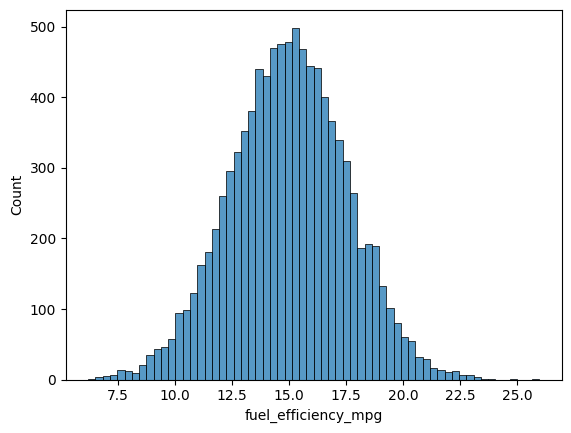

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df.fuel_efficiency_mpg)

The **fuel_efficiency_mpg** variable **does not** have a long tail

## Question 1

There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [6]:
for col in df.columns:
    print(col)
    print('Number of null values: %s' % df[col].isnull().sum())
    
    print()

engine_displacement
Number of null values: 0

horsepower
Number of null values: 708

vehicle_weight
Number of null values: 0

model_year
Number of null values: 0

fuel_efficiency_mpg
Number of null values: 0



The answer is the **horsepower** column

## Question 2

What's the median (50% percentile) for variable **horsepower**?

- 49
- 99
- 149
- 199

In [7]:
df['horsepower'].median()

np.float64(149.0)

## Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed **42**.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [8]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [9]:
seed = 42
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [10]:
# Shuffle the dataset
df_shuffled = df.iloc[idx]

# Split the dataset in train/val/test sets, with 60%/20%/20% distribution
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [11]:
# Reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [12]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [13]:
df_train.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
df_val.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
df_test.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [23]:
def prepare_X(df, fillna_value):
    assert df.select_dtypes(include=np.number).shape[1] == df.shape[1], \
    "Not all columns in the DataFrame are numeric."
    return df.fillna(fillna_value).values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y_pred - y 
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Missing values replaced with 0

In [24]:
# Training part
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

rmse_0 = rmse(y_val, y_pred)
round(rmse_0, 2)

np.float64(0.52)

### Missing values replaced with mean value of the horsepower column

In [25]:
# Training part
X_train = prepare_X(df_train, df['horsepower'].mean())
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val, df['horsepower'].mean())
y_pred = w0 + X_val.dot(w)

rmse_mean = rmse(y_val, y_pred)
rmse_mean

np.float64(0.46360196121428665)

Question: Which option gives better RMSE? 

Answer: **With mean**

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:
- 0
- 0.01
- 1
- 10
- 100

In [17]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [30]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
 
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
    score = round(score, 2)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0 bias term:  28.82736547365895 rmse:  0.52
reg parameter:  0.01 bias term:  24.92683841981215 rmse:  0.52
reg parameter:  0.1 bias term:  11.239661084581073 rmse:  0.52
reg parameter:  1 bias term:  1.7315979411219746 rmse:  0.52
reg parameter:  5 bias term:  0.3638075020482907 rmse:  0.52
reg parameter:  10 bias term:  0.18306246621686947 rmse:  0.52
reg parameter:  100 bias term:  0.01841801730688404 rmse:  0.52


After rounding the RMSE scores, they all look the same. Let us check the original values to determine the smallest one

In [31]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
 
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0 bias term:  28.82736547365895 rmse:  0.5173782638844466
reg parameter:  0.01 bias term:  24.92683841981215 rmse:  0.5171115525769823
reg parameter:  0.1 bias term:  11.239661084581073 rmse:  0.5187525130702517
reg parameter:  1 bias term:  1.7315979411219746 rmse:  0.5222348802093141
reg parameter:  5 bias term:  0.3638075020482907 rmse:  0.522891609282361
reg parameter:  10 bias term:  0.18306246621686947 rmse:  0.5229812979636599
reg parameter:  100 bias term:  0.01841801730688404 rmse:  0.5230636233819933


The smalest **r** value is **0.01**

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [32]:
def prepare_X(df):
    return df.fillna(0).values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

In [47]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values = []
for seed in seeds:
    # Set seed value and shuffle the indexes
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Get shuffled dataset
    df_shuffled = df.iloc[idx]
    
    # Split the dataset in train/val/test sets, with 60%/20%/20% distribution
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Reset indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Extract 'y'
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # Remove the fuel_efficiency_mpg column from the datasets
    df_train.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
    df_val.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
    df_test.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)

    # Train the model without regularization
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train)

    # Evaluate the model on the validation dataset
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    # Collect RMSE scores
    score = rmse(y_val, y_pred)
    rmse_values.append(score)

# Compute the standard deviation
std_deviation = np.std(rmse_values)
std_deviation

np.float64(0.006991133429659069)

The standard deviation of all the scores is **0.006**

## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [39]:
def prepare_X(df):
    return df.fillna(0).values

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [48]:
# Set seed value to 9 and shuffle the indexes
seed = 9
# Set r to 0.001
r = 0.001
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

# Get shuffled dataset
df_shuffled = df.iloc[idx]

# Split the dataset in train/val/test sets, with 60%/20%/20% distribution
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extract 'y'
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove the fuel_efficiency_mpg column from the datasets
df_train.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
df_val.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)
df_test.drop(columns=['fuel_efficiency_mpg'], errors='ignore', inplace=True)

# Combine train and validation datasets 
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

# Combine 'y' for train and validation datasets
y_full_train = np.concatenate([y_train, y_val])

# Train the model on the combined dataset
X_full_train = prepare_X(df_full_train) 
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

# Evaluate the model on the test dataset
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
score

np.float64(0.5156261299169602)

The RMSE on the test dataset is **0.515**